# Practica 8

Elaborado por:
**Carolina Arias Reyes** - **220159**

### PASO 1: Librerias y configuraciones

In [5]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical functions

from itertools import cycle, combinations  # Igenerating combinations & cycle

import matplotlib.pyplot as plt # data visualization
from matplotlib.ticker import FuncFormatter  # For custom formatting of ticks
from matplotlib.ticker import FormatStrFormatter  # For formatting ticks with a string
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes module
from matplotlib.colors import ListedColormap  # Importing colormap for scatter plot
import seaborn as sns # statistical data visualization
from wordcloud import WordCloud  # Importing WordCloud library for textual data visualization

from io import StringIO

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: total: 2.94 s
Wall time: 4.4 s


In [6]:
# Set the plot style to 'fivethirtyeight'
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Define global styling properties
global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


### PASO 2: Carga del dataset

In [43]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('salaries.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: total: 234 ms
Wall time: 248 ms


### PASO 3: Resumen de atributos

In [45]:
def display_dataframe_with_custom_header(df, show_head=False):
   """
   Muestra información del DataFrame de forma simple
   """
   
   if show_head:
       print("DATAFRAME HEAD")
       print("=" * 30)
       display(df.head())
   else:
       print("DATAFRAME INFORMATION")
       print("=" * 30)
       df.info()

In [47]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)

DATAFRAME INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73160 entries, 0 to 73159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73158 non-null  float64
 1   experience_level    73150 non-null  object 
 2   employment_type     73150 non-null  object 
 3   job_title           73158 non-null  object 
 4   salary              73138 non-null  float64
 5   salary_currency     73155 non-null  object 
 6   salary_in_usd       73144 non-null  float64
 7   employee_residence  73152 non-null  object 
 8   remote_ratio        73158 non-null  float64
 9   company_location    73158 non-null  object 
 10  company_size        73158 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB
DATAFRAME HEAD


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,NaN,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,NaN,USD,110000.0,US,0.0,US,M
4,2025.0,NaN,FT,Engineer,NaN,USD,143000.0,US,0.0,US,M


### PASO 4: Manejo de valores perdidos

In [49]:
def plot_missing_values_heatmap(df):
   # Calculate the sum of missing values excluding the first column
   missing_values_sum = df.isna().iloc[:, 1:].sum()
   
   # Create a custom color palette - cambiar aquí el esquema de colores
   custom_palette = sns.color_palette("viridis", as_cmap=True)  # Cambié de "colorblind" a "viridis"
   
   # Create a heatmap plot
   plt.figure(figsize=(22, 4), facecolor='silver')
   ax = sns.heatmap(missing_values_sum.to_frame(name='').T.rename(columns=lambda x: x.replace('_', ' ').title()), 
                    cmap=custom_palette, annot=True, fmt='0.0f',
                    annot_kws={"fontsize":30, "fontweight": "bold"},
                    linecolor='black', linewidth=2)
   
   # Set title and adjust fontsize
   plt.title('Count of Missing Values', pad=20, fontsize=18, color='#FF9734', fontname='Calibri', fontweight='bold')
   
   # Rotate the x-axis labels
   ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15, fontweight='bold')
   
   # Adjust font size and weight of y-axis labels
   ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, fontweight='bold')
   
   # Show the plot
   plt.show()

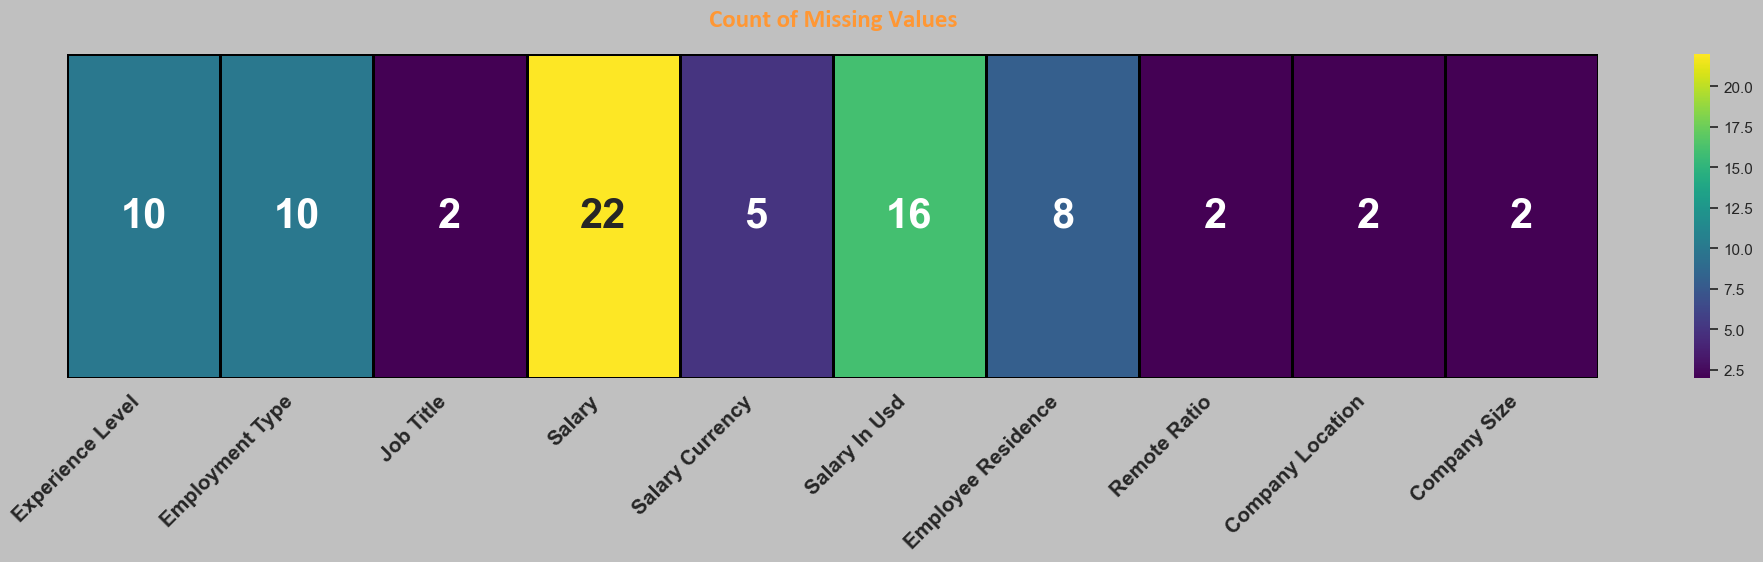

In [51]:
plot_missing_values_heatmap(df)

### PASO 5: Manejo de valores duplicados

In [12]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 39125 duplicate values


In [13]:
def apply_duplicated_styling(df):
    
    # Define a function to apply font size and color to values
    def apply_style(value):
        if value:
            return 'font-size: 20px; color: red'
        else:
            return 'font-size: 20px; color: green'

    # Define a function to apply font size to column names
    def apply_column_name_style(value):
        return 'font-size: 20px'

    # Transpose the DataFrame and check for duplicated values along the rows
    column_duplicates = df.T.duplicated()

    # Apply styling to the DataFrame containing duplicated values
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Apply styling to the column names
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '20px')]}])

    return styled_column_duplicates

In [14]:
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


### PASO 6: Datos estadisticos

In [23]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()  # Initialize an empty dataframe
    # Measure of central tendency
    stat['Mean'] = numeric_df.mean()  # for mean of all columns
    stat['Median'] = numeric_df.median()  # for median of all columns
    stat['Mode'] = numeric_df.mode().iloc[0]  # for mode of all columns
    # Measure of dispersion
    stat['Range'] = (numeric_df.max() - numeric_df.min())
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()
    # Interquartile range - CORREGIDO
    stat['IQR'] = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)  # Método alternativo más confiable
    # Quantiles
    stat['25%'] = numeric_df.quantile(q=0.25, axis=0)
    stat['50%'] = numeric_df.quantile(q=0.50, axis=0)
    stat['75%'] = numeric_df.quantile(q=0.75, axis=0)
    # Minimum and maximum
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()
    # Skewness and Kurtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()
    # Transpose the DataFrame
    stat = stat.T
    # Apply the float format
    stat = stat.applymap('{:,.2f}'.format)
    # Apply the background color with transparency
    styled_df = stat.style.apply(lambda x: [f'background: rgba(173, 216, 230, {opacity})' for val in x], axis=1)
    
    # Apply font size
    styled_df = styled_df.set_properties(**{'font-size': font_size})
    
    return styled_df

In [25]:
# Example usage:
# Assuming you have a DataFrame called 'df' and want to set transparency to 0.5
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,"2,023.83","162,553.44","158,013.75",21.59
Median,"2,024.00","148,000.00","147,500.00",0.00
Mode,"2,024.00","160,000.00","160,000.00",0.00
Range,5.00,"30,386,000.00","785,000.00",100.00
Stdev,0.48,"192,576.11","72,501.30",41.03
Variance,0.23,"37,085,558,909.14","5,256,439,187.32","1,683.27"
IQR,0.00,"93,042.50","92,810.00",0.00
25%,"2,024.00","106,957.50","106,890.00",0.00
50%,"2,024.00","148,000.00","147,500.00",0.00
75%,"2,024.00","200,000.00","199,700.00",0.00


In [17]:
def variable_summary(df, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values

        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

In [18]:
# DataFrame called 'df'
summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,work_year,float64,73158,6,2
1,experience_level,object,73156,5,4
2,employment_type,object,73156,5,4
3,job_title,object,73158,289,2
4,salary,float64,73148,7094,12
5,salary_currency,object,73158,25,2
6,salary_in_usd,float64,73148,7702,12
7,employee_residence,object,73158,93,2
8,remote_ratio,float64,73158,3,2
9,company_location,object,73158,86,2
